In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import csv

from programs.utils import levenhstein



In [2]:
HEADER_PAIRS = [('lname_hw_m', 'lname_p_m'),  # voornaam bruidegom / vader
                ('fname_hw_m', 'fname_p_m'),  # familienaam bruidegom / vader
                ('lname_hw_f', 'lname_p_f'),  # voornaam bruid / moeder
                ('fname_hw_f', 'fname_p_f')]   # familienaam bruid / moeder

NAME_VARIANTS = dict()   # telt het aantal naam variants per naam-paar
for h1, h2 in HEADER_PAIRS:
    NAME_VARIANTS[''.join([h1, '_', h2])] = Counter()

In [3]:
# pas dit aan naar de directory waar de input bestanden zijn opgeslagen (relatief aan de huidige directory)
source_directory = 'datafiles/analyses/per editdistance/'

# header = "dist|id_1|lname_hw_m|fname_hw_m|lname_hw_f|fname_hw_f|id_2|lname_p_m|fname_p_m|lname_p_f|fname_p_f"

lvl_3 = pd.read_csv(source_directory + 'matches_links_exact_lvl_3.csv', sep='|', index_col=False)
lvl_4 = pd.read_csv(source_directory + 'matches_links_exact_lvl_4.csv', sep='|', index_col=False)
lvl_5 = pd.read_csv(source_directory + 'matches_links_exact_lvl_5.csv', sep='|', index_col=False)

lvl_3

,dist,id_1,lname_hw_m,fname_hw_m,lname_hw_f,fname_hw_f,id_2,lname_p_m,fname_p_m,lname_p_f,fname_p_f
0,0,704975,francois,orlebeke,anna,ee,825011,francois,orlebeke,anna,ee
1,0,704975,francois,orlebeke,anna,ee,765913,francois,orlebeke,anna,ee
2,0,704975,francois,orlebeke,anna,ee,867673,francois,orlebeke,anna,ee
3,0,704975,francois,orlebeke,anna,ee,871314,francois,orlebeke,anna,ee
4,0,726156,jacobus,dieleman,maria,ee,792357,jacobus,dieleman,maria,ee
5,3,847018,jacobus,dieleman,maria,deij,792357,jacobus,dieleman,maria,ee
6,0,871025,pieter,dees,maria,ee,797450,pieter,dees,maria,ee
7,0,871025,pieter,dees,maria,ee,887689,pieter,dees,maria,ee
8,0,721357,josephus,babijn,catharina,ee,801059,josephus,babijn,catharina,ee
9,0,721357,josephus,babijn,catharina,ee,770988,josephus,babijn,catharina,ee


In [4]:

for h1, h2 in HEADER_PAIRS:
    
    # vervang lege velden (np.nan) naar lege strings
    lvl_3[h1] = lvl_3[h1].fillna('')
    lvl_3[h2] = lvl_3[h2].fillna('')
    lvl_4[h1] = lvl_4[h1].fillna('')
    lvl_4[h2] = lvl_4[h2].fillna('')
    lvl_5[h1] = lvl_5[h1].fillna('')
    lvl_5[h2] = lvl_5[h2].fillna('')
    
    # Check of de namen precies overeen komen (per naam-paar)...
    header_equal = 'name_' + str(HEADER_PAIRS.index((h1, h2)) + 1) + '_equal'
    lvl_3[header_equal] = lvl_3[h1] == lvl_3[h2]
    lvl_4[header_equal] = lvl_4[h1] == lvl_4[h2]
    lvl_5[header_equal] = lvl_5[h1] == lvl_5[h2]
    

In [5]:
# Check of er precies 1 False is in de name_x_equal kolommen
lvl_3['error_in_one_name'] = sum([~lvl_3['name_' + str(i) + '_equal'] for i in [1,2,3,4]]) == 1
lvl_4['error_in_one_name'] = sum([~lvl_4['name_' + str(i) + '_equal'] for i in [1,2,3,4]]) == 1
lvl_5['error_in_one_name'] = sum([~lvl_5['name_' + str(i) + '_equal'] for i in [1,2,3,4]]) == 1

lvl_3

,dist,id_1,lname_hw_m,fname_hw_m,lname_hw_f,fname_hw_f,id_2,lname_p_m,fname_p_m,lname_p_f,fname_p_f,name_1_equal,name_2_equal,name_3_equal,name_4_equal,error_in_one_name
0,0,704975,francois,orlebeke,anna,ee,825011,francois,orlebeke,anna,ee,True,True,True,True,False
1,0,704975,francois,orlebeke,anna,ee,765913,francois,orlebeke,anna,ee,True,True,True,True,False
2,0,704975,francois,orlebeke,anna,ee,867673,francois,orlebeke,anna,ee,True,True,True,True,False
3,0,704975,francois,orlebeke,anna,ee,871314,francois,orlebeke,anna,ee,True,True,True,True,False
4,0,726156,jacobus,dieleman,maria,ee,792357,jacobus,dieleman,maria,ee,True,True,True,True,False
5,3,847018,jacobus,dieleman,maria,deij,792357,jacobus,dieleman,maria,ee,True,True,True,False,True
6,0,871025,pieter,dees,maria,ee,797450,pieter,dees,maria,ee,True,True,True,True,False
7,0,871025,pieter,dees,maria,ee,887689,pieter,dees,maria,ee,True,True,True,True,False
8,0,721357,josephus,babijn,catharina,ee,801059,josephus,babijn,catharina,ee,True,True,True,True,False
9,0,721357,josephus,babijn,catharina,ee,770988,josephus,babijn,catharina,ee,True,True,True,True,False


In [6]:
def get_error_name_info(row):
    """
    Geeft een tuple terug met de index van de naam waarin de fout zit en de lengte van de kortste naam,
    mits de fout in één naam zit.
    Voorbeeld: 
    
        jan|pieterse|margriet|ee <--> jan|pieterse|maria|ee 
        geeft (3, 5) terug 
        
        jan|peterse|margriet|ee <--> janus|pieterse|margreet|ee
        geeft (-1, NAN) terug
        
    Gaat er van uit dat de kolommen met de uitkomst van de check per naam-paar bestaat. Zo niet, dan 
    gaat alles fout.
    """
    # als de fout niet in 1 naam zit, dan is de index: -1 (en wordt de lengte van de naam ook niet uitgerekend )
    index = [row['name_' + str(i) + '_equal'] for i in [1,2,3,4]].index(False) if row.error_in_one_name else -1
    if index >= 0:
        h1, h2 = HEADER_PAIRS[index]
        name_length = min(len(row[h1]), len(row[h2])) 
        return index + 1, name_length
    
    else:
        return index, np.nan
    
    
lvl_3['error_name_index'], lvl_3['error_name_length'] = zip(*lvl_3.apply(get_error_name_info, axis=1))
lvl_4['error_name_index'], lvl_4['error_name_length'] = zip(*lvl_4.apply(get_error_name_info, axis=1))
lvl_5['error_name_index'], lvl_5['error_name_length'] = zip(*lvl_5.apply(get_error_name_info, axis=1))

lvl_3

,dist,id_1,lname_hw_m,fname_hw_m,lname_hw_f,fname_hw_f,id_2,lname_p_m,fname_p_m,lname_p_f,fname_p_f,name_1_equal,name_2_equal,name_3_equal,name_4_equal,error_in_one_name,error_name_index,error_name_length
0,0,704975,francois,orlebeke,anna,ee,825011,francois,orlebeke,anna,ee,True,True,True,True,False,-1,NaN
1,0,704975,francois,orlebeke,anna,ee,765913,francois,orlebeke,anna,ee,True,True,True,True,False,-1,NaN
2,0,704975,francois,orlebeke,anna,ee,867673,francois,orlebeke,anna,ee,True,True,True,True,False,-1,NaN
3,0,704975,francois,orlebeke,anna,ee,871314,francois,orlebeke,anna,ee,True,True,True,True,False,-1,NaN
4,0,726156,jacobus,dieleman,maria,ee,792357,jacobus,dieleman,maria,ee,True,True,True,True,False,-1,NaN
5,3,847018,jacobus,dieleman,maria,deij,792357,jacobus,dieleman,maria,ee,True,True,True,False,True,4,2.0
6,0,871025,pieter,dees,maria,ee,797450,pieter,dees,maria,ee,True,True,True,True,False,-1,NaN
7,0,871025,pieter,dees,maria,ee,887689,pieter,dees,maria,ee,True,True,True,True,False,-1,NaN
8,0,721357,josephus,babijn,catharina,ee,801059,josephus,babijn,catharina,ee,True,True,True,True,False,-1,NaN
9,0,721357,josephus,babijn,catharina,ee,770988,josephus,babijn,catharina,ee,True,True,True,True,False,-1,NaN


In [7]:
# filter op de rijen met de maximum edit distance en waarbij die distance in 1 naam zit (...en alleen bepaalde kolommen...)
plotframe_3 = lvl_3[(lvl_3['dist'] == 3) & lvl_3.error_in_one_name][['dist', 'id_1', 'id_2', 'error_in_one_name', 'error_name_length']]
plotframe_4 = lvl_4[(lvl_4['dist'] == 4) & lvl_4.error_in_one_name][['dist', 'id_1', 'id_2', 'error_in_one_name', 'error_name_length']]
plotframe_5 = lvl_5[(lvl_5['dist'] == 5) & lvl_5.error_in_one_name][['dist', 'id_1', 'id_2', 'error_in_one_name', 'error_name_length']]

plotframe_3

,dist,id_1,id_2,error_in_one_name,error_name_length
5,3,847018,792357,True,2.0
14,3,888495,734439,True,2.0
106,3,700396,722463,True,4.0
107,3,700396,760449,True,4.0
146,3,731218,873009,True,9.0
147,3,731218,842115,True,9.0
178,3,761991,762612,True,6.0
179,3,761991,772302,True,6.0
217,3,811218,730194,True,6.0
219,3,891297,745313,True,4.0


In [8]:
group_3 = plotframe_3.groupby(['error_name_length'])
group_4 = plotframe_4.groupby(['error_name_length'])
group_5 = plotframe_5.groupby(['error_name_length'])

In [9]:
group_3.size()

error_name_length
1.0        2
2.0       65
3.0     1030
4.0     2277
5.0     2188
6.0     1154
7.0     1037
8.0      613
9.0      269
10.0     329
11.0      25
12.0      16
13.0       1
14.0       1
17.0       1
19.0       1
20.0       1
dtype: int64

In [10]:
group_4.size()

error_name_length
0.0        2
1.0        2
2.0       57
3.0     1812
4.0     5251
5.0     6538
6.0     2651
7.0     1215
8.0      404
9.0      187
10.0      61
11.0       7
12.0       4
dtype: int64

In [11]:
group_5.size()

error_name_length
0.0         3
1.0         2
2.0       198
3.0      2793
4.0      7747
5.0     13239
6.0      5838
7.0      2434
8.0       579
9.0       218
10.0       39
11.0        3
dtype: int64

In [12]:
#df = pd.DataFrame(columns=[3,4,5], index=xrange(0,max(int(group_3.groups.keys()[-1]), int(group_4.groups.keys()[-1]), int(group_5.groups.keys()[-1])) + 1))
df = pd.DataFrame(columns=[3,4,5], index=xrange(0,21))
df[3] = group_3.size()
df[4] = group_4.size()
df[5] = group_5.size()
df = df.fillna(0)
df['3-perc'] = (df[3] / df[3].sum()) * 100
df['4-perc'] = (df[4] / df[4].sum()) * 100
df['5-perc'] = (df[5] / df[5].sum()) * 100

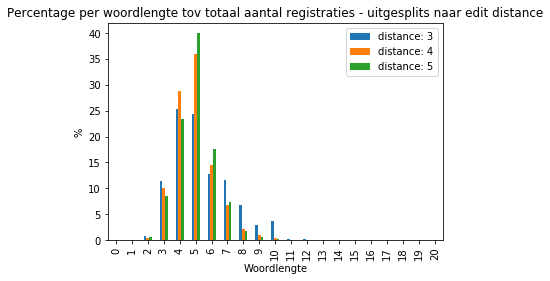

In [13]:
# barplot van het percentage van de count per woordlengte tov het totaal (per edit distance)
df[['3-perc', '4-perc', '5-perc']].plot.bar()
plt.title('Percentage per woordlengte tov totaal aantal registraties - uitgesplits naar edit distance')
plt.xlabel('Woordlengte')
plt.ylabel('%')
plt.legend(['distance: 3', 'distance: 4', 'distance: 5'])
plt.savefig(source_directory + 'percentage_per_woordlengte_per_distance.png', dpi=100, bbox_inches='tight')
plt.show()

In [14]:
df.to_csv(source_directory + 'dist_in_een_woord.csv', sep="|")

In [15]:
# Totaal aantal matches met een afstand van 3 in 1 naam
df[3].sum()

9010.0

In [16]:
# Totaal aantal matches met een afstand van 4 in 1 naam
df[4].sum()

18191.0

In [17]:
# Totaal aantal matches met een afstand van 5 in 1 naam
df[5].sum()

33093.0

In [18]:
def get_name_variants(row):
    
    for h1, h2 in HEADER_PAIRS:
        NAME_VARIANTS[''.join([h1, '_', h2])].update([(row[h1], row[h2])])

In [19]:
lvl_3.apply(get_name_variants, axis=1)

0         None
1         None
2         None
3         None
4         None
5         None
6         None
7         None
8         None
9         None
10        None
11        None
12        None
13        None
14        None
15        None
16        None
17        None
18        None
19        None
20        None
21        None
22        None
23        None
24        None
25        None
26        None
27        None
28        None
29        None
          ... 
247464    None
247465    None
247466    None
247467    None
247468    None
247469    None
247470    None
247471    None
247472    None
247473    None
247474    None
247475    None
247476    None
247477    None
247478    None
247479    None
247480    None
247481    None
247482    None
247483    None
247484    None
247485    None
247486    None
247487    None
247488    None
247489    None
247490    None
247491    None
247492    None
247493    None
dtype: object

In [24]:
for key in NAME_VARIANTS.keys():
    with open('datafiles/name_variants_' + key + '.csv', 'w+') as csv_file:
        writer = csv.writer(csv_file, delimiter=';', lineterminator='\n')
        for n1, n2 in NAME_VARIANTS[key].keys():
            print n1, n2, NAME_VARIANTS[key][(n1, n2)]
            writer.writerow([n1, n2, NAME_VARIANTS[key][(n1, n2)]])

imand imand 1
kreijn krijn 2
elias elias 135
quirinus quirinus 15
emilius emileus 1
berthus berthus 1
davis david 5
franciscus franciscis 1
bauke bouke 1
cyrillus cijrillus 2
eewoud ewoud 2
charles charel 9
michiel maghiel 1
anthonis anthonis 3
wijnandus wijnand 4
lammert lammert 1
dolphing dolphing 1
quirijn querijn 1
cijrillus cijrilles 1
triphon triphon 3
alexis alexius 5
ferdinandus ferdinancus 1
justus justus 12
desire desiree 1
tobias tobias 84
balthasar balthazar 1
hendrick hendrik 1
laurens louwerens 3
philipppus philippus 1
rochus rochus 12
philemondus philemondus 2
anthonius anthoni 1
modest modest 4
cerillus cerillus 16
jozef josef 1
maria maria 2
geralphus gerolphus 2
edouard eduard 1
lejier leijer 1
dingman dingeman 1
francus francus 1
michiel machiel 35
emil emil 8
aarnhout aarnout 1
carl carl 13
jochem jochem 2
guillielmus guillielmus 1
valentin valentijn 1
matijs matijs 7
anthonij anthonij 732
gerard geerrard 2
francisius francisius 1
jeras jeras 7
ipolitus hippolitus 1